# Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns

# sns.set(style="darkgrid")

load data as pandas.DataFrame,
check it looks correct.

Rename columns.

In [2]:
df: pd.DataFrame = pd.read_csv('fortune500.csv')
print(df.head())
# df.tail()
# df.columns
# df.index
# df.index.values
assert len(df) == 25500
assert len(df.columns) == 5

df.columns = ['year', 'rank', 'company', 'revenue', 'profit']
print(f"\nShape = {df.shape}\n")
print(df.dtypes)

   Year  Rank           Company  Revenue (in millions) Profit (in millions)
0  1955     1    General Motors                 9823.5                  806
1  1955     2       Exxon Mobil                 5661.4                584.8
2  1955     3        U.S. Steel                 3250.4                195.4
3  1955     4  General Electric                 2959.1                212.6
4  1955     5            Esmark                 2510.8                 19.1

Shape = (25500, 5)

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object


Profit dtype is wrong. Check why

369 non-numeric profit entries
{'N.A.'}


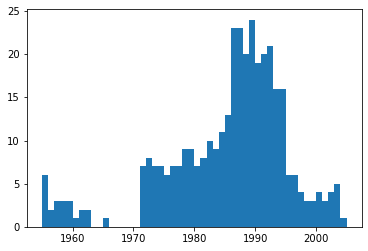

In [3]:
non_numberic_profits = df.profit.str.contains('[^0-9.-]')
print(f"{len(df.profit[non_numberic_profits])} non-numeric profit entries")
df.loc[non_numberic_profits].head()
print(set(df.profit[non_numberic_profits]))

bin_sizes, _, _ = plt.hist(df.year[non_numberic_profits], bins=range(1955, 2006))

Remove the N.A. profits

In [4]:
df = df.loc[~non_numberic_profits]
df.profit = df.profit.apply(pd.to_numeric)
print(f"{len(df)} entries remain. dtype of 'profits': {df.profit.dtype}")

25131 entries remain. dtype of 'profits': float64


Plot average profit by year

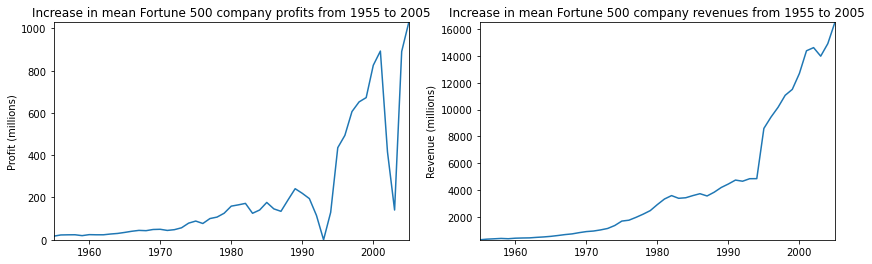

In [5]:
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')
avgs = group_by_year.mean()

x = avgs.index
y1 = avgs.profit

def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)

fig = plt.figure()
fig.set_size_inches(14, 4)
fig.tight_layout()

ax = fig.add_subplot(121)
plot(x, y1, ax, 'Increase in mean Fortune 500 company profits from 1955 to 2005', 'Profit (millions)')

y2 = avgs.revenue
ax2 = fig.add_subplot(122)
plot(x, y2, ax2, 'Increase in mean Fortune 500 company revenues from 1955 to 2005', 'Revenue (millions)')

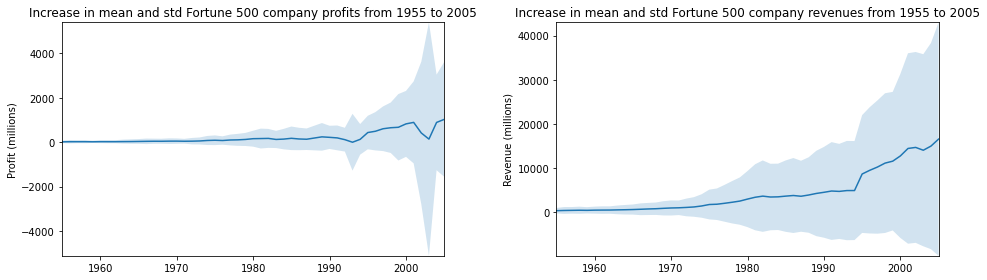

In [7]:
def plot_with_std(x, y, stds, ax, title, y_label):
    ax.fill_between(x, y - stds, y + stds, alpha=0.2)
    plot(x, y, ax, title, y_label)
    
fig, (ax1, ax2) = plt.subplots(ncols=2)
title = 'Increase in mean and std Fortune 500 company %s from 1955 to 2005'
stds1 = group_by_year.std().profit.values
stds2 = group_by_year.std().revenue.values
plot_with_std(x, y1.values, stds1, ax1, title % 'profits', 'Profit (millions)')
plot_with_std(x, y2.values, stds2, ax2, title % 'revenues', 'Revenue (millions)')
fig.set_size_inches(14, 4)
fig.tight_layout()